In [ ]:
import sys, platform
print("Python:", sys.version)
print("OS:", platform.platform())


Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
OS: Linux-6.6.105+-x86_64-with-glibc2.35


In [ ]:
import pandas as pd

URL = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"

df = pd.read_csv(URL)   # columns: 'Month','Passengers'
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month').asfreq('MS')   # Month Start frequency
df.head(), df.shape

(            Passengers
 Month                 
 1949-01-01         112
 1949-02-01         118
 1949-03-01         132
 1949-04-01         129
 1949-05-01         121,
 (144, 1))

Missing values:
 Passengers    0
dtype: int64
Date range: 1949-01-01 00:00:00 → 1960-12-01 00:00:00


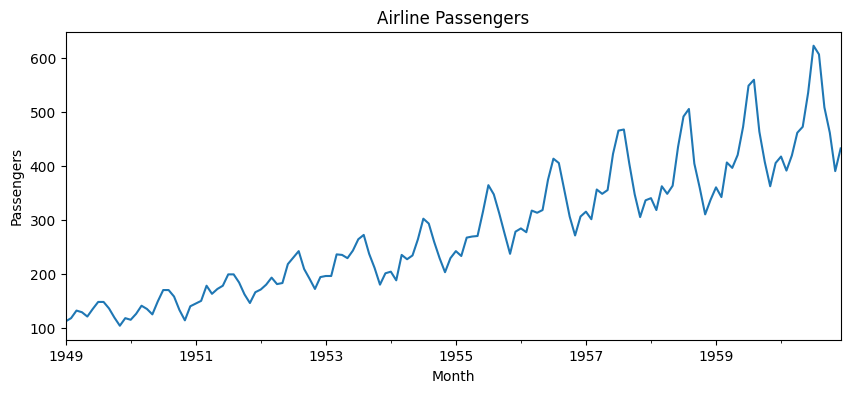

In [ ]:
ax = df['Passengers'].plot(figsize=(10,4), title="Airline Passengers", ylabel="Passengers")
ax.figure.show()

print("Missing values:\n", df.isna().sum())
print("Date range:", df.index.min(), "→", df.index.max())


In [ ]:
y = df['Passengers'].astype('float64')

test_horizon = 12
train = y.iloc[:-test_horizon]
test  = y.iloc[-test_horizon:]

train.tail(), test.head()


(Month
 1959-08-01    559.0
 1959-09-01    463.0
 1959-10-01    407.0
 1959-11-01    362.0
 1959-12-01    405.0
 Freq: MS, Name: Passengers, dtype: float64,
 Month
 1960-01-01    417.0
 1960-02-01    391.0
 1960-03-01    419.0
 1960-04-01    461.0
 1960-05-01    472.0
 Freq: MS, Name: Passengers, dtype: float64)

In [ ]:
arima_order = (2, 1, 2)

model = ARIMA(train, order=arima_order)
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -607.782
Date:                Mon, 03 Nov 2025   AIC                           1225.563
Time:                        05:13:52   BIC                           1239.939
Sample:                    01-01-1949   HQIC                          1231.405
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6660      0.024     68.561      0.000       1.618       1.714
ar.L2         -0.9294      0.022    -41.536      0.000      -0.973      -0.886
ma.L1         -1.8324      0.032    -56.857      0.0

In [ ]:
fc = model_fit.forecast(steps=len(test))
fc.index = test.index  # align index for plotting

fc.head()


,predicted_mean
Month,
1960-01-01,411.312453
1960-02-01,430.812660
1960-03-01,457.433605
1960-04-01,483.661492
1960-05-01,502.616754


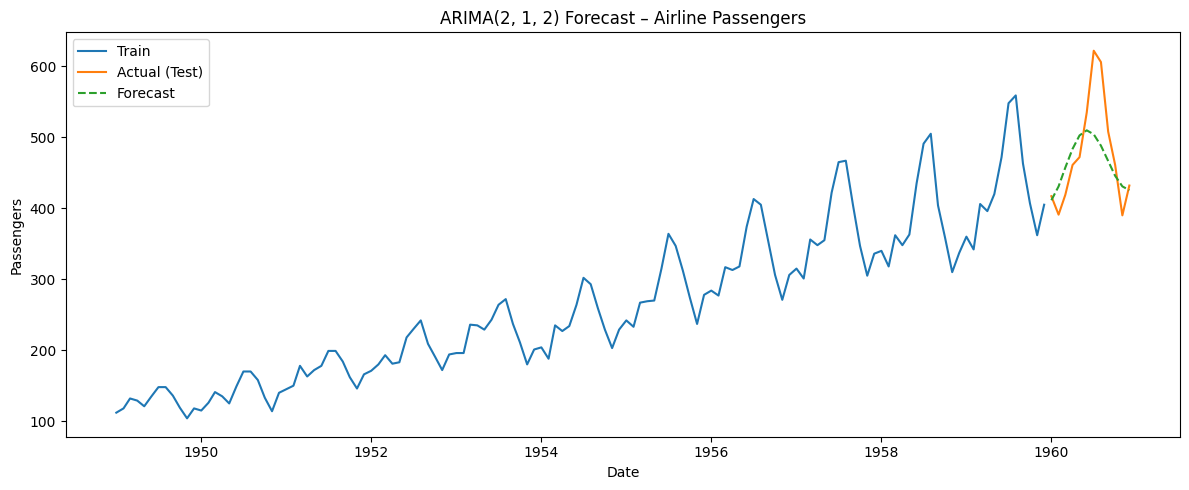

✅ Plot saved as ts_forecast_plot.png


In [ ]:
plt.figure(figsize=(12,5))
plt.plot(train, label="Train")
plt.plot(test,  label="Actual (Test)")
plt.plot(fc,    label="Forecast", linestyle="--")
plt.title(f"ARIMA{arima_order} Forecast – Airline Passengers")
plt.xlabel("Date"); plt.ylabel("Passengers"); plt.legend()
plt.tight_layout()
plt.savefig("ts_forecast_plot.png", dpi=150)
plt.show()

print("✅ Plot saved as ts_forecast_plot.png")


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae  = mean_absolute_error(test, fc)
rmse = np.sqrt(mean_squared_error(test, fc))

print(f"MAE  : {mae:,.2f}")
print(f"RMSE : {rmse:,.2f}")

MAE  : 41.83
RMSE : 55.22


In [ ]:
out = pd.DataFrame({
    "date": test.index,
    "actual": test.values,
    "forecast": fc.values
})
out.to_csv("ts_forecast_results.csv", index=False)
df.to_csv("ts_airline_prepared.csv")

print("✅ Saved:")
print(" - ts_forecast_results.csv")
print(" - ts_airline_prepared.csv")
print(" - ts_forecast_plot.png")


✅ Saved:
 - ts_forecast_results.csv
 - ts_airline_prepared.csv
 - ts_forecast_plot.png
